In [ ]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers? or are devices slower 
#have there been more drops in download, have upload/download times increased, has ping time increased 


In [ ]:
# Is the website redesign any good?
# has traffic increased? has traffic decreased? has there been ddos type activity, have we had more clicks per visit,
#have we had more ad revenue, or less, has there been mroe contact via email 

In [ ]:
# Is our television ad driving more sales?
#has sales incrreases since ads reeleased or have sales increased due to price reduction 

In [7]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

np.random.seed(123)


In [2]:
n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1, 7, (nrows, ncols))

data[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [3]:
calculated_averages = data.mean(axis=1)
calculated_averages


array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

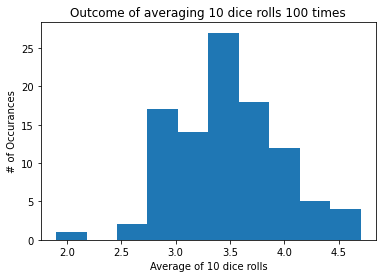

In [5]:
plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')
plt.show()


In [8]:
db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  

In [9]:
df.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

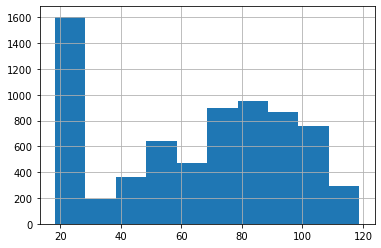

In [10]:
df.monthly_charges.hist()
plt.show()

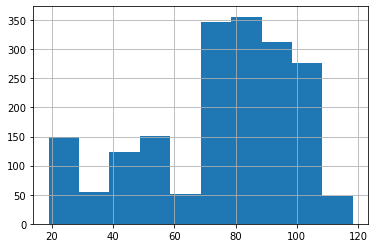

In [12]:
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()
plt.show()

In [13]:
α = .05
df.churn.value_counts()


No     5174
Yes    1869
Name: churn, dtype: int64

In [14]:
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, α)


16.96540308050567 1.8703196496911995e-60 0.05


In [59]:
${H0: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers}$
$Ha: Mean of monthly charges of churned customers > Mean of monthly charges of all customers$

SyntaxError: invalid syntax (3886440910.py, line 1)

In [16]:
if p/2 > α:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [19]:
t, p = stats.ttest_1samp(churn_sample, overall_mean)
t, p


(16.96540308050567, 3.740639299382399e-60)

In [21]:
print(t < 0)
print(p/2 < α)


False
True


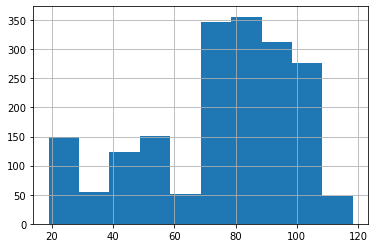

In [23]:
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()
plt.show()

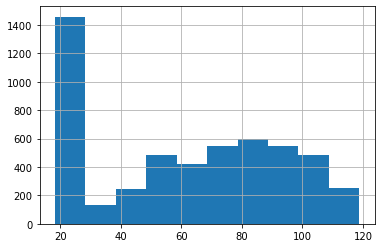

In [24]:
no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()
plt.show()

In [33]:
print(churn_sample.var())
print(no_churn_sample.var())


608.4141833954315
966.7527670734293


In [26]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
t, p / 2


(18.407526676414673, 4.2962246657737696e-73)

In [27]:
print("is p/2 < α? ", p / 2 < α)
print("is t > 0? ", t > 0)


is p/2 < α?  True
is t > 0?  True


In [28]:
if p / 2 > α:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [29]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p


(18.407526676414673, 8.592449331547539e-73)

In [30]:
print("Reject $H_{0}$? ", p < α)


Reject $H_{0}$?  True


In [32]:
df = sns.load_dataset('iris')
df.species.value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [34]:
df.sepal_length.describe()


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [35]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length


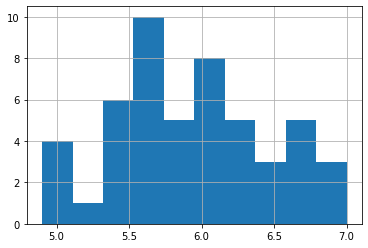

In [36]:
versicolor_sepal_length.hist()
plt.show()

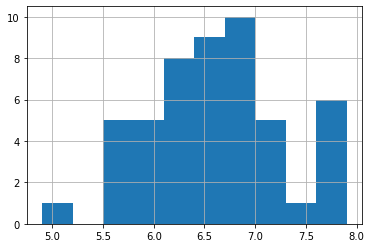

In [37]:
virginica_sepal_length.hist()
plt.show()

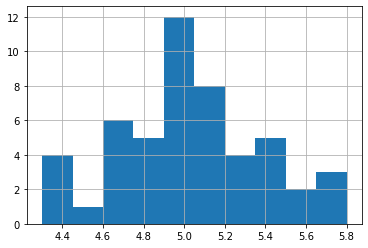

In [38]:
setosa_sepal_length.hist()
plt.show()

In [39]:
print(versicolor_sepal_length.var())
print(virginica_sepal_length.var())
print(setosa_sepal_length.var())


0.2664326530612246
0.40434285714285706
0.12424897959183666


In [40]:
f, p = stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)
f, p


(119.26450218450472, 1.6696691907693648e-31)

In [41]:
if p < α:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")


We reject $H_{0}$


In [42]:
df = sns.load_dataset('mpg')
df.origin.value_counts()


usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [43]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [44]:
df = df[~df['horsepower'].isna()]


In [45]:
usa_hp = df[df.origin == 'usa'].horsepower
japan_hp = df[df.origin == 'japan'].horsepower
eu_hp = df[df.origin == 'europe'].horsepower


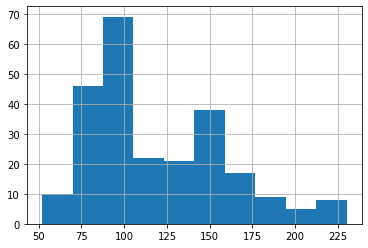

In [46]:
usa_hp.hist()
plt.show()

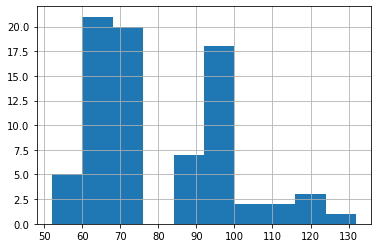

In [47]:
japan_hp.hist()
plt.show()

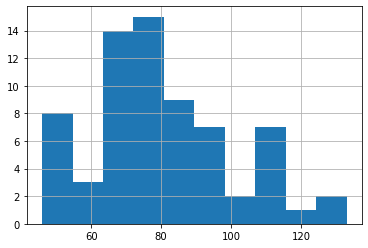

In [48]:
eu_hp.hist()
plt.show()

In [49]:
usa_hp.var()


1591.8336567413864

In [50]:
japan_hp.var()


317.5238558909445

In [51]:
eu_hp.var()


406.3397717295875

In [52]:
usa_hp = df[df.origin == 'usa'].horsepower
non_usa_hp = df[df.origin != 'usa'].horsepower


In [53]:
print(usa_hp.var())
print(non_usa_hp.var())


1591.8336567413864
356.2380020501352


In [54]:
t, p = stats.ttest_ind(usa_hp, non_usa_hp, equal_var=False)
t, p


(13.017135027378012, 3.384733024288272e-32)

In [56]:
p < α


True

In [57]:
stats.kruskal(usa_hp, japan_hp, eu_hp)


KruskalResult(statistic=105.59475799843663, pvalue=1.1759521262123952e-23)

In [ ]:
# Ace Realty wants to determine whether the average time it takes to sell 
# homes is different for its two offices. A sample of 40 sales from office
# #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office 
# #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

o1ss=40
o1= 90
o1s=15
o2ss=50
o2=100
o2s=20


In [80]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [124]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

from pydataset import data
df = pd.DataFrame(data('mpg'))
df['ampg'] = df.cty + df.hwy/2

In [125]:
c2008_my = df[df.year == 2008].ampg
c1999_my = df[df.year == 1999].ampg

In [126]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  ampg          234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


<AxesSubplot:>

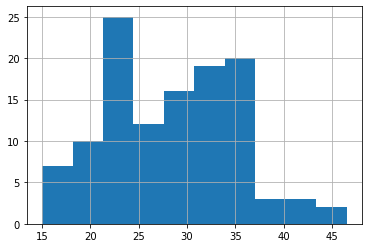

In [127]:
c2008_my.hist()


<AxesSubplot:>

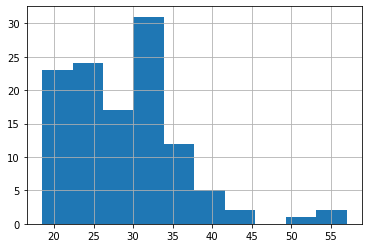

In [128]:
c1999_my.hist()


In [154]:
df.rename(columns = {'class':'ctype'}, inplace = True)


pd.unique(df.ctype)

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [130]:
c1999_my.var()


54.9290450928382

In [131]:
c2008_my.var()

47.87183171234894

In [132]:
t, p = stats.ttest_ind(c2008_my, c1999_my, equal_var=False)
t, p


(-0.3236957615075299, 0.7464613597643072)

In [133]:
p < α


False

In [155]:
# Are compact cars more fuel-efficient than the average car?
average_mpg = df[df.ctype == 'midsize'].ampg
comp_mpg = df[df.ctype == 'compact'].ampg

# Do manual cars get better gas mileage than automatic cars?

In [156]:
t2, p2 = stats.ttest_ind(comp_mpg, average_mpg, equal_var=False)
t2, p2


(2.1224944799623238, 0.037152598005748806)

In [157]:
comp_mpg.var(),average_mpg.var()

(27.041396854764116, 8.377743902439025)

In [158]:
stat, p_levene = stats.levene(comp_mpg, average_mpg)
if p_levene < 0.05:
    print('we can reject the H0')
else:
    print('we cannot reject the H0')

we can reject the H0


In [164]:
pd.unique(df.trans)

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [160]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  ctype         234 non-null    object 
 11  ampg          234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [178]:
# Do manual cars get better gas mileage than automatic cars?
manual_mpg = df[df['trans'].str.contains('manual')].ampg
auto_mpg = df[df['trans'].str.contains('auto')].ampg

In [187]:
#t3, p3 = stats.ttest_ind(manual_mpg, average_mpg, equal_var=False)
t3, p3 = stats.levene(manual_mpg, average_mpg)

t3< p3


False

<AxesSubplot:>

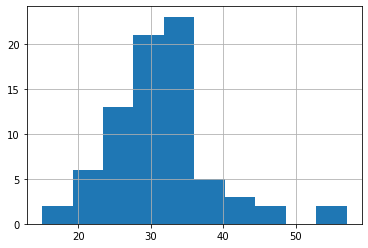

In [186]:
manual_mpg.hist() 

<AxesSubplot:>

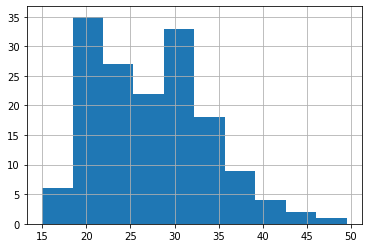

In [184]:
auto_mpg.hist()

In [183]:
stat, p_levene = stats.levene(manual_mpg, auto_mpg)
if p_levene < 0.05:
    print('we can reject the H0')
else:
    print('we cannot reject the H0')

we cannot reject the H0
